In [102]:
import pandas as pd
df = pd.read_csv('./Downloads/data.csv')

In [3]:
#Q1. What is the 4th highest product sold in terms of total revenue generated overall ?

In [36]:
sum_df = df.groupby('product')['total'].sum().reset_index(name ='sum')
sum_df.sort_values(by=['sum'],ascending =False, inplace=True,ignore_index=True )
print('4th highest product sold is :"{}" Total revenue:"{}"'.format(sum_df['product'][3], sum_df['sum'][3]))

4th highest product sold is :Google Phone Total revenue:3319200.0


In [37]:
#Q2. Which City sees the maximum number of orders being placed in the month of June 2019?

In [72]:
city, total_order = df[(df['month']==6) & (df['year']==2019)].groupby('city')['quantity'].sum().reset_index(name ='sum').max()
print('City: "{}" got the maximum number of orders : "{}" in month of June 2019'.format(city, total_order))

City: Seattle got the maximum number of orders : 3687 in month of June 2019


In [51]:
#Q3. What is the least popular product in terms of unique orders in the city of Los Angeles. ?

In [75]:
least = df[df['city']=='Los Angeles'].groupby('product')['product'].count().idxmin()
print('"{}" is the least popular product in the city of Los Angeles'.format(least))

"LG Washing Machine"" is the least popular product in the city of Los Angeles


In [76]:
#Q4. Which state has the highest revenue generated from all the apple products in year 2019?

In [95]:
val = df[(df['product'].str.contains('apple|macbook|iphone',case=False) & (df['year']==2019))].groupby('city')['total'].sum().idxmax()
print('"{}" has the highest revenue generated from all the apple products in year 2019'.format(val))

"San Francisco" has the highest revenue generated from all the apple products in year 2019


In [96]:
#Q5. What is the difference of revenue generated between weekend and weekday in the state of CA ?

In [122]:
df_ca = df[df['state']=='CA']
val = df_ca[df_ca['day'].str.contains('Mon|Tue|Thu',case=False)]['total'].sum() - df_ca[df_ca['day'].str.contains('Fri|Sat|Sun', case=False)]['total'].sum()
print(f"Differnce of revenue generated between weekend and weekday in state of CA is = {val:.2f}")

Differnce of revenue generated between weekend and weekday in state of CA is = 127524.95


In [123]:
#Q6. Which city has seen the overall least orders in night hours in the months of May, June and July 2019.

In [130]:
val = df[(df['month'].between(5,7) & (df['year']==2019) &(df['hour'].between(18,24)))].groupby('city')['total'].sum().idxmin()
print('"{}" has seen the overall least orders in night hours in the months of May, June and July 2019'.format(val))

"Austin" has seen the overall least orders in night hours in the months of May, June and July 2019


In [131]:
#Q7. Is “Google Phone” better performing in respect to overall number of orders placed as well as revenue generated than “iphone” in “New York City” ?

In [146]:
google_phone = df[(df['product']=='Google Phone') & (df['city']=="New York City")]
iphone = df[(df['product']=='iPhone') & (df['city']=="New York City")]
if google_phone['total'].sum() > iphone['total'].sum() and   google_phone['quantity'].sum() > iphone['quantity'].sum():
    print('Yes Total "Google phone" revenue generated = {}, Total "Iphone" revenue generated = {}'.format(google_phone['total'].sum(), iphone['total'].sum())) 
    print('Total "Google phone" order={} , Iphone order={}'.format(google_phone['quantity'].sum(), iphone['quantity'].sum()))
else:
    print('No Total "Google phone" revenue generated = {}, Total "Iphone" revenue generated = {}'.format(google_phone['total'].sum(), iphone['total'].sum())) 
    print('Total "Google phone" order={} , Iphone order={}'.format(google_phone['quantity'].sum(), iphone['quantity'].sum()))

No Total "Google phone" revenue generated = 454800.0, Total "Iphone" revenue generated = 616700.0
Total "Google phone" order=758 , Iphone order=881


In [147]:
#Q8. What is the absolute difference in total number of unique orders being created in the cities of “Boston” and “Portland” for the month of Jan in both years 2019 & 2020 ?

In [157]:
boston = df[(df['year'].between(2019,2020)) & (df['city']=="Boston") & df['month']==1]['order_id'].count()
portland = df[(df['year'].between(2019,2020)) & (df['city']=="Portland") & df['month']==1]['order_id'].count()
print("Absolute difference is {}".format(boston-portland))

Absolute difference is 3657


In [158]:
#Q9. Plot pie chart for 4 categories based on their total revenue generated.
#Weekend-Day , Weekend-Night, Weekday-Day, Weekday-Night.

In [169]:
weekday = df[df['day'].str.contains('Mon|Tue|Thu',case=False)]
weekend = df[df['day'].str.contains('Fri|Sat|Sun',case=False)]
weekday_day = int(weekday[weekday['hour'].between(0,17)]['total'].sum())
weekday_night = int(weekday[weekday['hour'].between(18,24)]['total'].sum())
weekend_day = int(weekend[weekend['hour'].between(0,17)]['total'].sum())
weekend_night = int(weekend[weekend['hour'].between(18,24)]['total'].sum())

total revenue generated


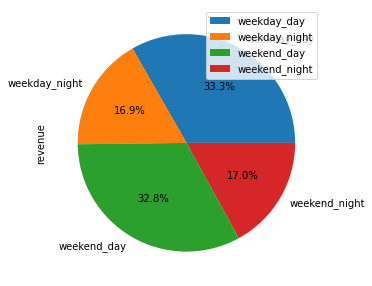

In [179]:
print("total revenue generated")
pdf = pd.DataFrame({'revenue': [weekday_day,weekday_night,weekend_day,weekend_night]},
                  index=['weekday_day','weekday_night','weekend_day','weekend_night'])
plt = pdf.plot.pie(y = 'revenue', figsize=(5, 5), autopct='%1.1f%%')

In [209]:
#Plot violin plot between above respective 13 categories of unique year month combinations Month_Year ( 1_2019 , 2_2019 …. 1_2020) along side the number of orders being placed. Write down the inferences according to the graph. (minimum 5)

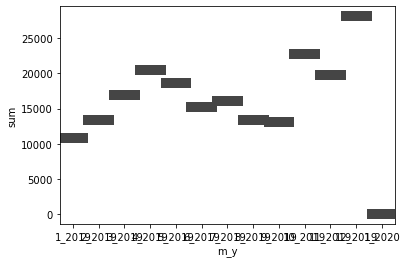

    year  month    sum      m_y
0   2019      1  10862   1_2019
1   2019      2  13449   2_2019
2   2019      3  17005   3_2019
3   2019      4  20558   4_2019
4   2019      5  18667   5_2019
5   2019      6  15253   6_2019
6   2019      7  16072   7_2019
7   2019      8  13448   8_2019
8   2019      9  13109   9_2019
9   2019     10  22703  10_2019
10  2019     11  19798  11_2019
11  2019     12  28114  12_2019
12  2020      1     41   1_2020


In [246]:
df1 = df[['year','month','quantity']].groupby(['year','month'])['quantity'].sum().reset_index(name ='sum')
orders = df1['sum']
df1['m_y'] = df1['month'].astype(str)+'_'+df1['year'].astype(str)
  
sns.violinplot(x='m_y', y='sum', data=df1, linewidth = 10)



plt.show()
print(df1)


In [247]:
#1.The orders dropped in Jan,2020
#2. The orders where highest in year end